In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Memuat Dataset

In [59]:
data =pd.read_csv('data/Balaji Fast Food Sales.csv')
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


# 2. Prepocessing Data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [26]:
# 1. Mengubah tipe data 'date' menjadi datetime
def parse_date(date_str):
    for fmt in ("%d-%m-%Y", "%m/%d/%Y"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

data['date'] = data['date'].apply(parse_date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    893 non-null    object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.2+ KB


In [27]:
data.isnull().sum()

,0
order_id,0
date,0
item_name,0
item_type,0
item_price,0
quantity,0
transaction_amount,0
transaction_type,107
received_by,0
time_of_sale,0


In [28]:
# 2. Mengisi data yang kosong
most_frequent_transaction = data['transaction_type'].mode()[0]
data['transaction_type'].fillna(most_frequent_transaction, inplace=True)
data.isnull().sum()

<ipython-input-28-1f0c99bc6204>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['transaction_type'].fillna(most_frequent_transaction, inplace=True)


,0
order_id,0
date,0
item_name,0
item_type,0
item_price,0
quantity,0
transaction_amount,0
transaction_type,0
received_by,0
time_of_sale,0


# 3. Exploratory Data Analysis (EDA)

In [32]:
data.describe()


,order_id,date,item_price,quantity,transaction_amount
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
mean,500.500000,2022-10-02 05:15:21.600000,33.315000,8.162000,275.230000
min,1.000000,2022-01-04 00:00:00,20.000000,1.000000,20.000000
25%,250.750000,2022-06-17 00:00:00,20.000000,4.000000,120.000000
50%,500.500000,2022-09-21 00:00:00,25.000000,8.000000,240.000000
75%,750.250000,2023-01-02 00:00:00,50.000000,12.000000,360.000000
max,1000.000000,2023-12-03 00:00:00,60.000000,15.000000,900.000000
std,288.819436,NaN,14.921744,4.413075,204.402979


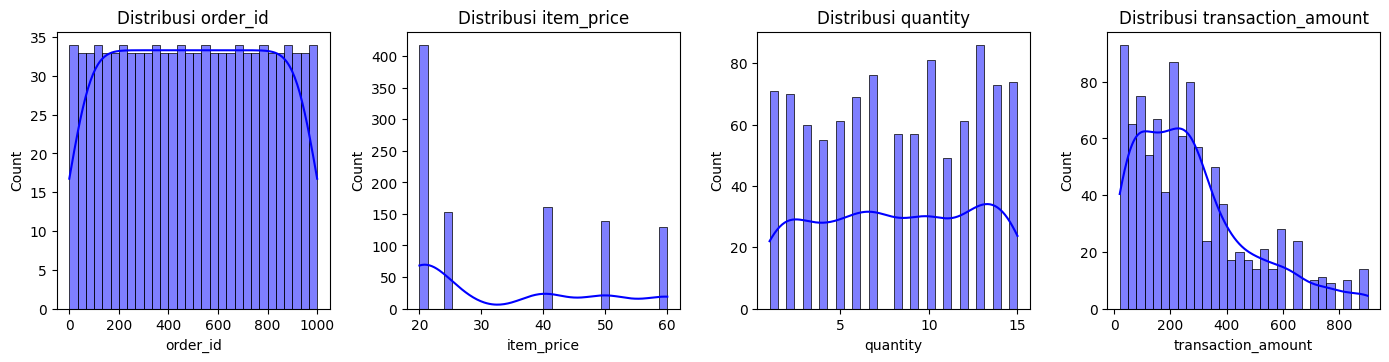

In [36]:
numerical_columns = data.select_dtypes(include=['int64']).columns
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()


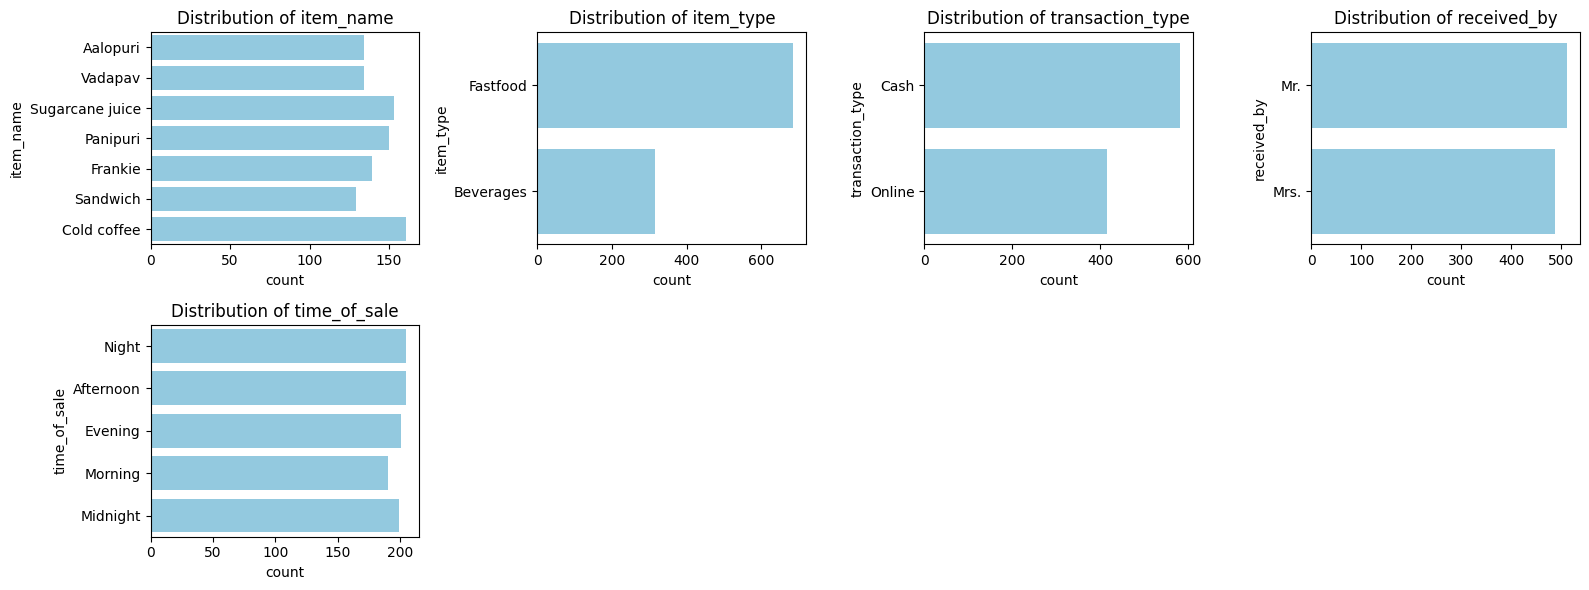

In [39]:
categorical_features = data.select_dtypes(include=['object']).columns
num_cat_features = len(categorical_features)

rows = (num_cat_features // 4) + (num_cat_features % 4 > 0)
cols = 4

plt.figure(figsize=(cols * 4, rows * 3))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(y=data[column], color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

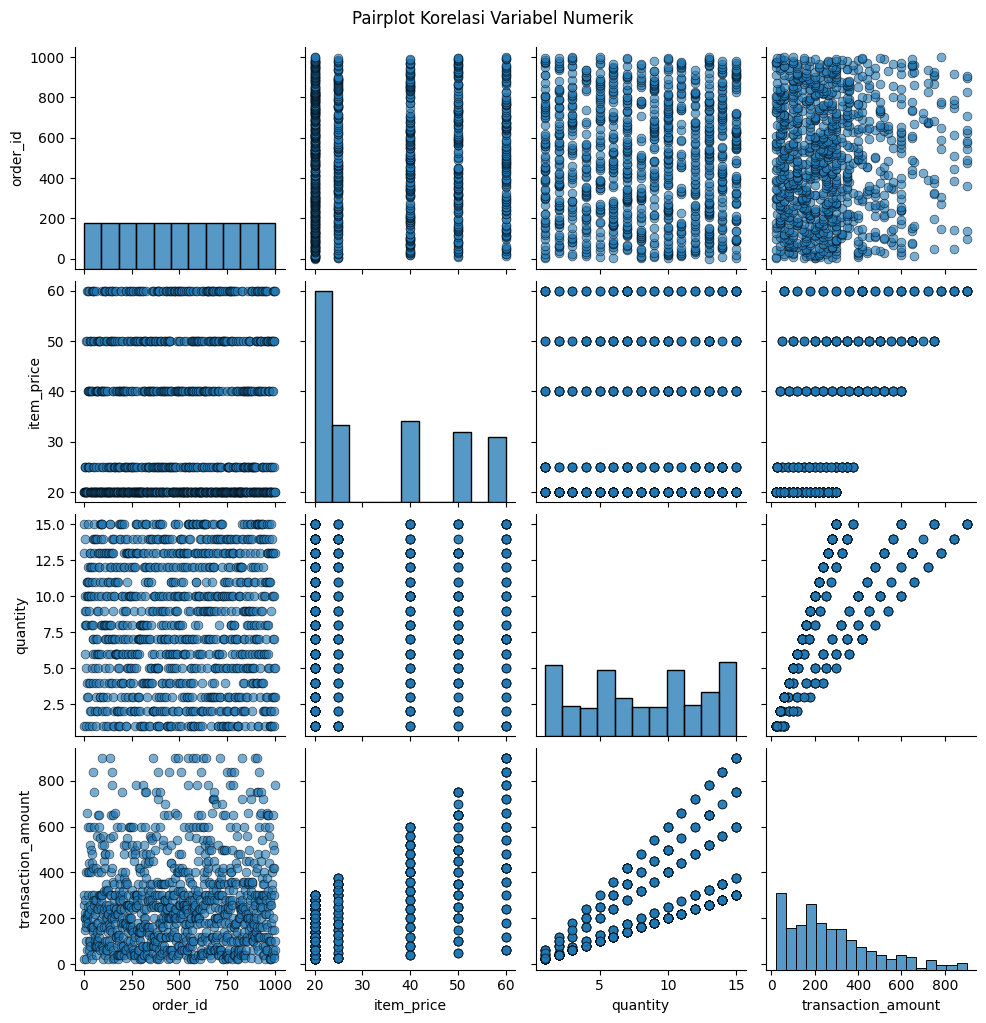

In [41]:
sns.pairplot(data[numerical_columns], kind='scatter', plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'})
plt.suptitle('Pairplot Korelasi Variabel Numerik', y=1.02)
plt.show()

In [53]:
data['day_of_week'] = data['date'].dt.day_name()

data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,day_of_week
0,1,2022-03-07,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night,Monday
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,Tuesday
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,Sunday
3,4,2023-03-02,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,Thursday
4,5,2022-02-10,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,Thursday


# 4. Visualisasi Data

<ipython-input-46-17409cb5b531>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette="Set2")


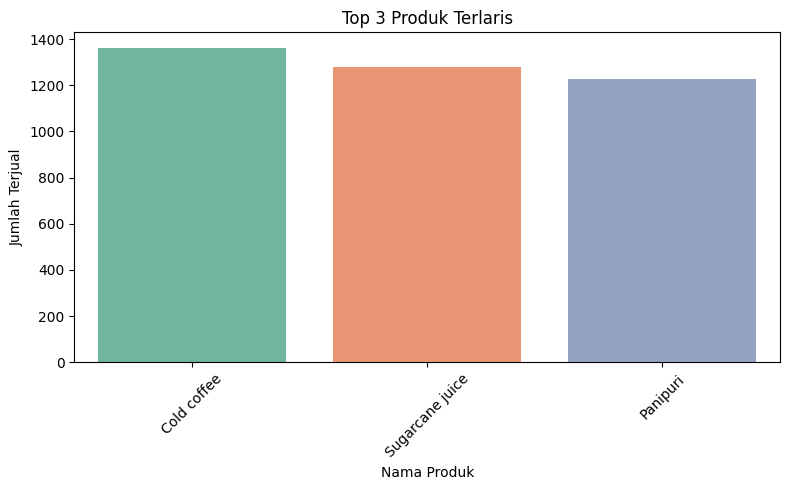

In [46]:
top_items = data.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(3)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_items.index, y=top_items.values, palette="Set2")
plt.title("Top 3 Produk Terlaris")
plt.ylabel("Jumlah Terjual")
plt.xlabel("Nama Produk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-47-b8221a6b495e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_types.index, y=item_types.values, palette="coolwarm")


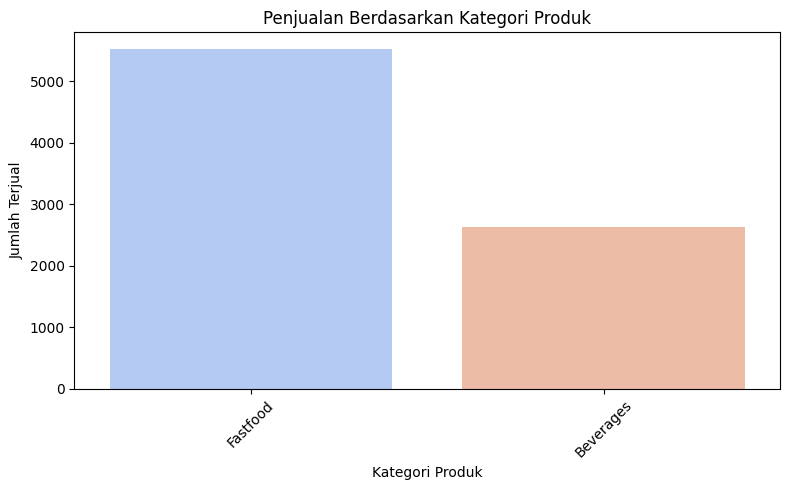

In [47]:
item_types = data.groupby('item_type')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=item_types.index, y=item_types.values, palette="coolwarm")
plt.title("Penjualan Berdasarkan Kategori Produk")
plt.ylabel("Jumlah Terjual")
plt.xlabel("Kategori Produk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-50-dc000d5ee964>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_types.index, y=item_types.values, palette="Set1")


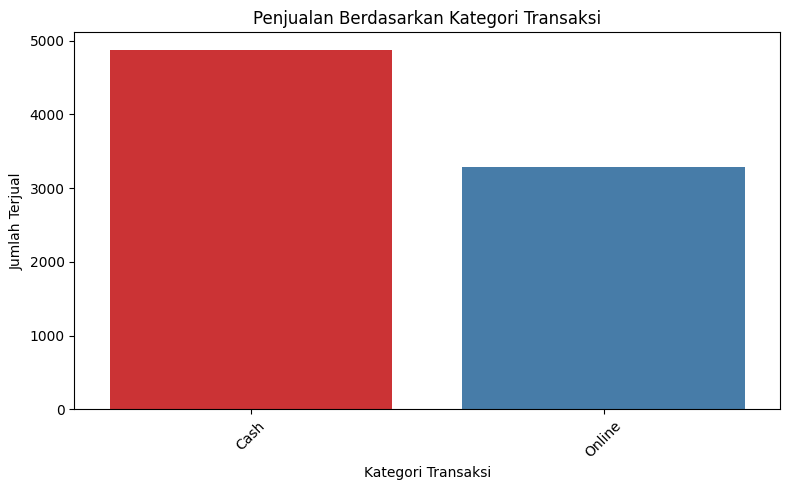

In [50]:
item_types = data.groupby('transaction_type')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=item_types.index, y=item_types.values, palette="Set1")
plt.title("Penjualan Berdasarkan Kategori Transaksi")
plt.ylabel("Jumlah Terjual")
plt.xlabel("Kategori Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-54-fa26e33c4d4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="coolwarm")


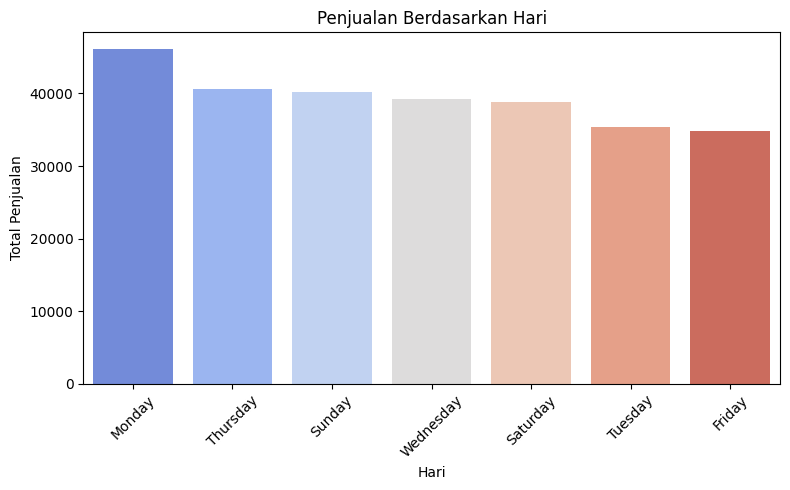

In [54]:
sales_by_day = data.groupby('day_of_week')['transaction_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="coolwarm")
plt.title("Penjualan Berdasarkan Hari")
plt.ylabel("Total Penjualan")
plt.xlabel("Hari")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Penjualan Berdasarkan Jam:
time_of_sale
Night        62075
Afternoon    56345
Morning      53730
Evening      52355
Midnight     50725
Name: transaction_amount, dtype: int64


<ipython-input-57-fcfe23f7f2c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values, palette="viridis")


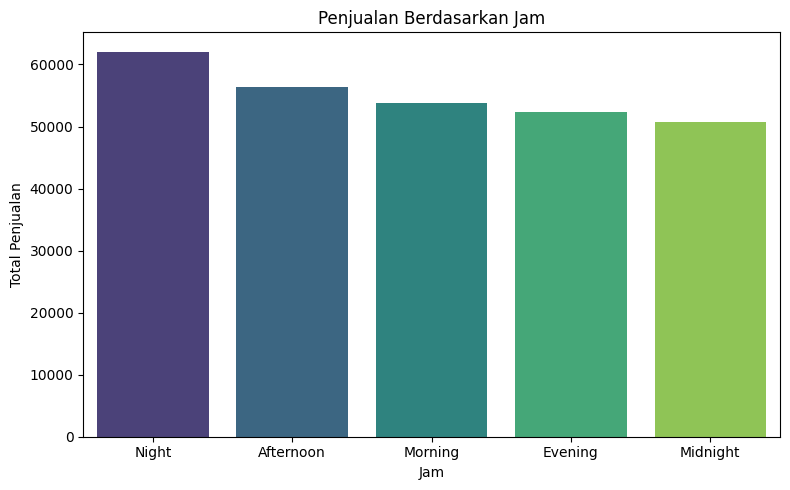

In [57]:
sales_by_hour = data.groupby('time_of_sale')['transaction_amount'].sum().sort_values(ascending=False)

print("\nPenjualan Berdasarkan Jam:")
print(sales_by_hour)

plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values, palette="viridis")
plt.title("Penjualan Berdasarkan Jam")
plt.ylabel("Total Penjualan")
plt.xlabel("Jam")
plt.tight_layout()
plt.show()

# 5. Simpan Data

In [60]:
data.to_csv('data/result_balaji_sales.csv', index=False)

print("Data berhasil diekspor ke file 'result_balaji_sales.csv'")

Data berhasil diekspor ke file 'result_balaji_sales.csv'
